# Add noise to data
Compare original vs noisy data

In [45]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_types = ['additive', 'multiplicative', 'combined', 'inverse', 'inverse_combined']
noise_level = 5

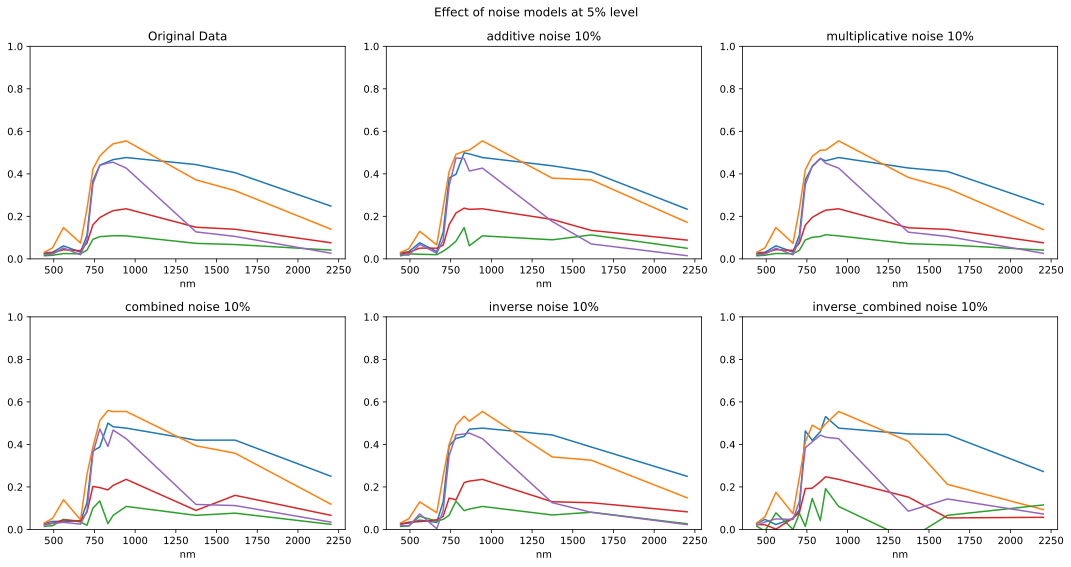

In [26]:
df = pd.concat(dfs, axis=0, ignore_index=True)

cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axs = axs.flatten()

df_sample = df.sample(5, random_state=42)
axs[0].set_title('Original Data')
axs[0].plot(x, df_sample[cols].T, linestyle='-')
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_types):
  df_noisy = pd.read_pickle(noisy_path + n + f'{noise_level}' +'.pkl')
  df_noisy_sample = df_noisy.sample(5, random_state=42)
  
  axs[i+1].set_title(f'{n} noise 10%')
  axs[i+1].plot(x, df_noisy_sample[cols].T, linestyle='-')
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 

plt.suptitle(f'Effect of noise models at {noise_level}% level')
plt.tight_layout()
  

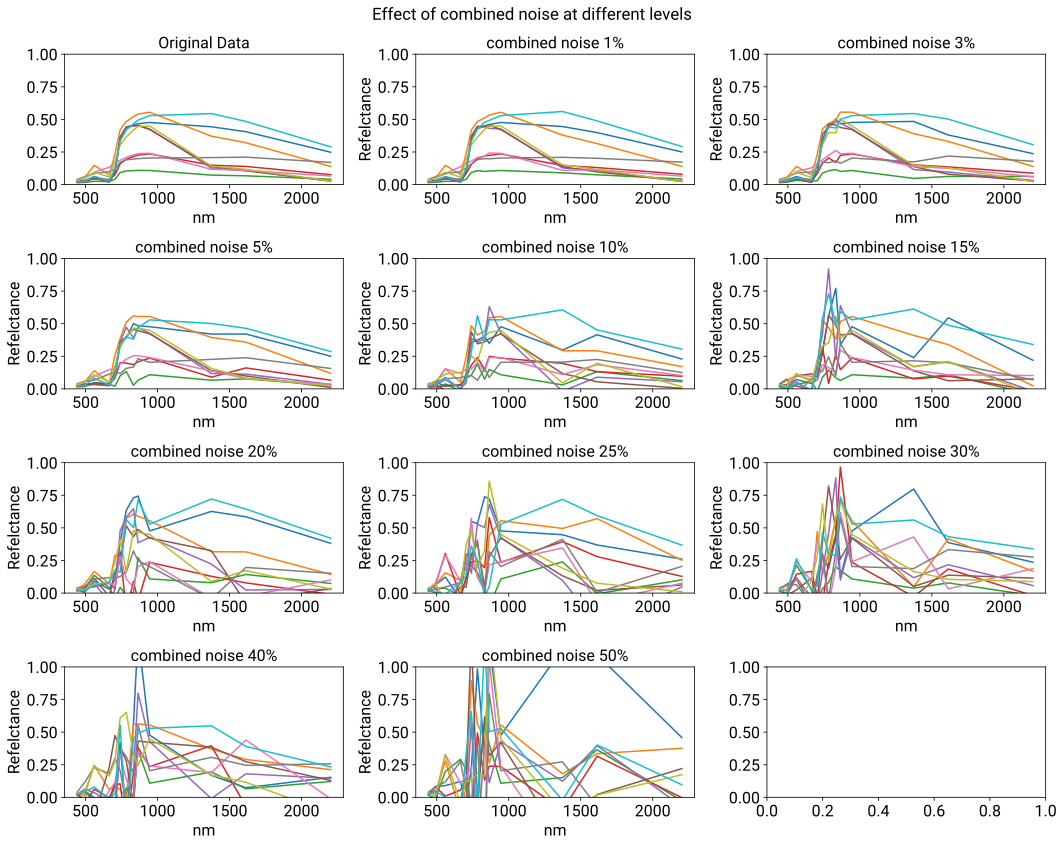

In [53]:
# Compare one model at different levels

data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_type = 'combined' #, 'multiplicative', 'combined', 'inverse', 'inverse_combined']
noise_levels = [1,3,5,10,15,20,25,30,40,50]



df = pd.concat(dfs, axis=0, ignore_index=True)

cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axs = axs.flatten()

df_sample = df.sample(10, random_state=42)
axs[0].set_title('Original Data')
axs[0].plot(x, df_sample[cols].T, linestyle='-')
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_levels):
  df_noisy = pd.read_pickle(noisy_path + noise_type + f'{n}' +'.pkl')
  df_noisy_sample = df_noisy.sample(10, random_state=42)
  
  axs[i+1].set_title(f'{noise_type} noise {n}%')
  axs[i+1].plot(x, df_noisy_sample[cols].T, linestyle='-')
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 
  axs[i+1].set_ylabel('Refelctance') 

plt.suptitle(f'Effect of {noise_type} noise at different levels')
plt.tight_layout()
  

In [56]:
df_noisy_sample[cols].T.values[-1]

array([0.25297739])

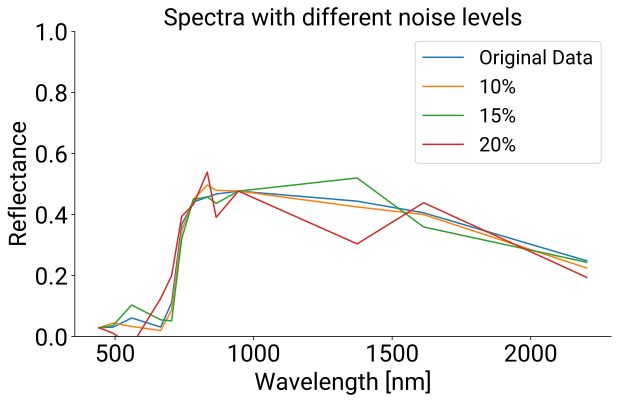

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data paths and variables are defined as in the original code
cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

# Read the data
if isinstance(data_path, str):
    df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
    dfs = [pd.read_pickle(path) for path in data_path]
    df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_type = 'inverse'  # 'multiplicative', 'combined', 'inverse', 'inverse_combined'
noise_levels = [10, 15, 20]

# Prepare the plot
fig, ax = plt.subplots(figsize=(9, 6))

# Define font sizes
SIZE_DEFAULT = 20
SIZE_LARGE = 24
plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_LARGE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_LARGE)  # fontsize of the tick labels


plt.title('Spectra with different noise levels')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectance')

# Plot original data
df_sample = df.sample(1, random_state=42)
plt.plot(x, df_sample[cols].T, label='Original Data', linestyle='-')

# Define a nice color palette:
colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot noisy data
for i, n in enumerate(noise_levels):
    df_noisy = pd.read_pickle(noisy_path + noise_type + f'{n}' + '.pkl')
    df_noisy_sample = df_noisy.sample(1, random_state=42)
    plt.plot(x, df_noisy_sample[cols].T, label=f'{n}%', linestyle='-') #, color=colors[i])

    """ 
    # Text
    ax.text(
        x[-1] * 1.01,
        df_noisy_sample[cols].T.values[-1],
        n,
        #color=colors[i],
        fontweight="bold",
        horizontalalignment="left",
        verticalalignment="center",
    )
    """ 

# Hide the top and right spine
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Add legend
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Compare effect on noise on low vs high LAI spectra

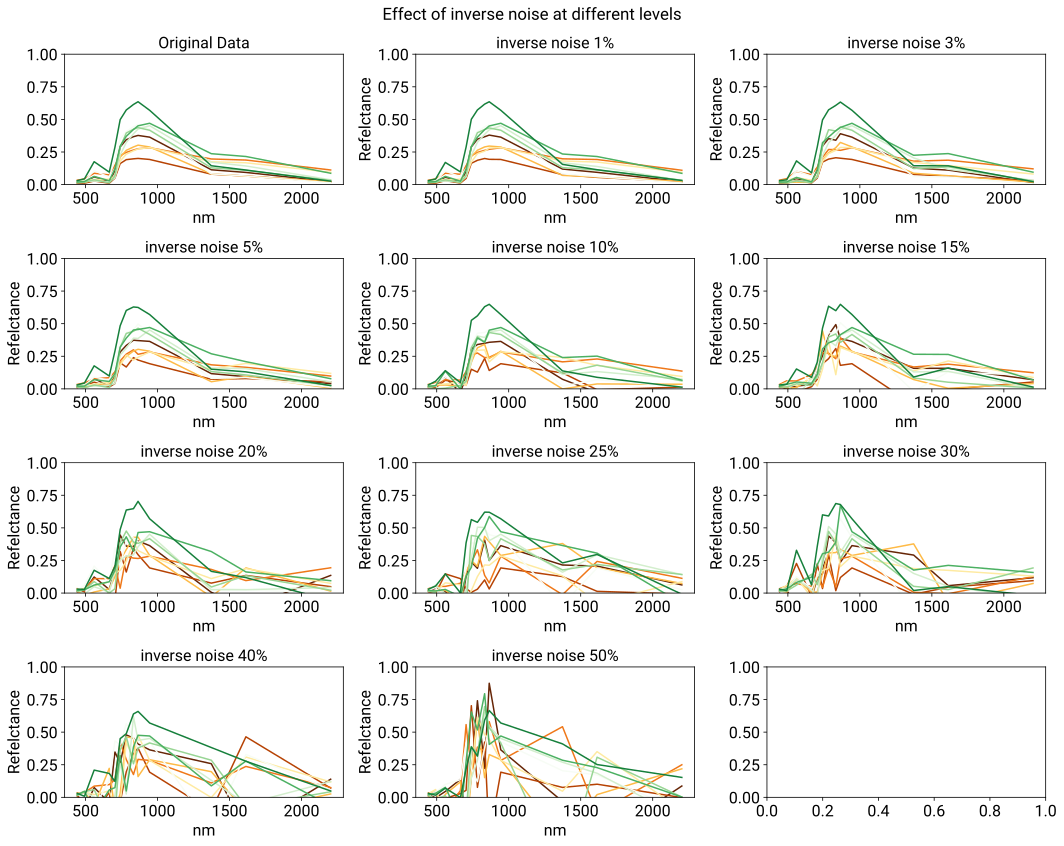

In [58]:
# Compare one model at different levels

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_LARGE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_LARGE)  # fontsize of the tick labels

data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_type = 'inverse' #, 'multiplicative', 'combined', 'inverse', 'inverse_combined']
noise_levels = [1,3,5,10,15,20,25,30,40,50]


cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axs = axs.flatten()

df_low_lai = df[df.lai<=3].sample(5, random_state=42).reset_index(drop=True)
df_high_lai = df[df.lai>3].sample(5, random_state=42).reset_index(drop=True)
axs[0].set_title('Original Data')
cmap = plt.get_cmap('YlOrBr')
for j, row in df_low_lai.iterrows():
    axs[0].plot(x, row[cols], linestyle='-', color=cmap(cmap.N - cmap.N*j//len(df_low_lai)))
cmap = plt.get_cmap('Greens')
for j, row in df_high_lai.iterrows():
    axs[0].plot(x, row[cols], linestyle='-', color=cmap(cmap.N*j//len(df_high_lai))) 
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_levels):
  df_noisy = pd.read_pickle(noisy_path + noise_type + f'{n}' +'.pkl')
  df_noisy_lowlai = df_noisy[df_noisy.lai<=3].sample(5, random_state=42).reset_index(drop=True)
  df_noisy_highlai = df_noisy[df_noisy.lai>3].sample(5, random_state=42).reset_index(drop=True)
  
  axs[i+1].set_title(f'{noise_type} noise {n}%')
  cmap = plt.get_cmap('YlOrBr')
  for j, row in df_noisy_lowlai.iterrows():
      axs[i+1].plot(x, row[cols], linestyle='-', color=cmap(cmap.N - cmap.N*j//len(df_low_lai)))
  cmap = plt.get_cmap('Greens')
  for j, row in df_noisy_highlai.iterrows():
      axs[i+1].plot(x, row[cols], linestyle='-', color=cmap(cmap.N*j//len(df_high_lai))) 
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 
  axs[i+1].set_ylabel('Refelctance') 

plt.suptitle(f'Effect of {noise_type} noise at different levels')
plt.tight_layout()
  

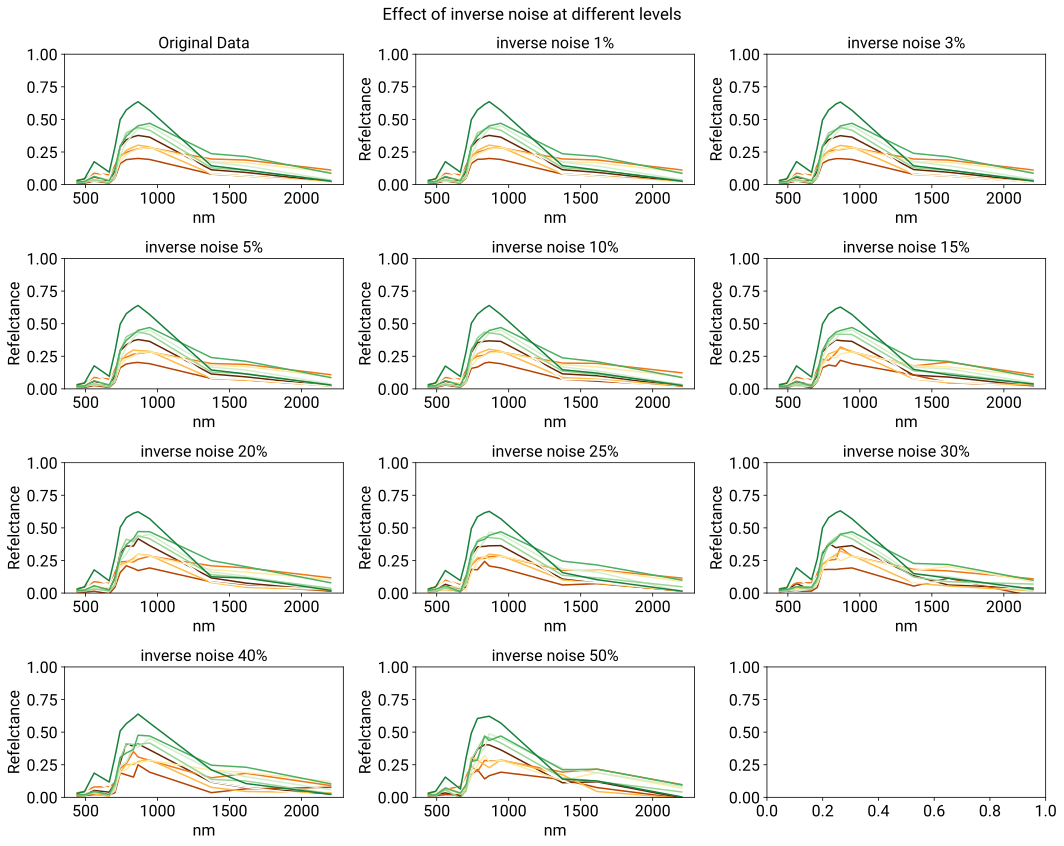

In [59]:
# Compare one model at different levels

# Define font sizes
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", family="Roboto")  # controls default font
plt.rc("font", weight="normal")  # controls default font
plt.rc("font", size=SIZE_DEFAULT)  # controls default text sizes
plt.rc("axes", titlesize=SIZE_LARGE)  # fontsize of the axes title
plt.rc("axes", labelsize=SIZE_LARGE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SIZE_LARGE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SIZE_LARGE)  # fontsize of the tick labels

data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_'
noise_type = 'inverse' #, 'multiplicative', 'combined', 'inverse', 'inverse_combined']
noise_levels = [1,3,5,10,15,20,25,30,40,50]


cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axs = axs.flatten()

df_low_lai = df[df.lai<=3].sample(5, random_state=42).reset_index(drop=True)
df_high_lai = df[df.lai>3].sample(5, random_state=42).reset_index(drop=True)
axs[0].set_title('Original Data')
cmap = plt.get_cmap('YlOrBr')
for j, row in df_low_lai.iterrows():
    axs[0].plot(x, row[cols], linestyle='-', color=cmap(cmap.N - cmap.N*j//len(df_low_lai)))
cmap = plt.get_cmap('Greens')
for j, row in df_high_lai.iterrows():
    axs[0].plot(x, row[cols], linestyle='-', color=cmap(cmap.N*j//len(df_high_lai))) 
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

for i, n in enumerate(noise_levels):
  df_noisy = pd.read_pickle(noisy_path + noise_type + f'{n}' +'_v2.pkl')
  df_noisy_lowlai = df_noisy[df_noisy.lai<=3].sample(5, random_state=42).reset_index(drop=True)
  df_noisy_highlai = df_noisy[df_noisy.lai>3].sample(5, random_state=42).reset_index(drop=True)
  
  axs[i+1].set_title(f'{noise_type} noise {n}%')
  cmap = plt.get_cmap('YlOrBr')
  for j, row in df_noisy_lowlai.iterrows():
      axs[i+1].plot(x, row[cols], linestyle='-', color=cmap(cmap.N - cmap.N*j//len(df_low_lai)))
  cmap = plt.get_cmap('Greens')
  for j, row in df_noisy_highlai.iterrows():
      axs[i+1].plot(x, row[cols], linestyle='-', color=cmap(cmap.N*j//len(df_high_lai))) 
  axs[i+1].set_ylim(0, 1) 
  axs[i+1].set_xlabel('nm') 
  axs[i+1].set_ylabel('Refelctance') 

plt.suptitle(f'Effect of {noise_type} noise at different levels')
plt.tight_layout()
  

# Analyse mixed noise model

In [16]:
noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_mixed.pkl'
df_noisy = pd.read_pickle(noisy_path)

In [17]:
df_noisy

,B01,B09,ant,cab,car,cbrown,ccc,cm,cw,hspot,...,B03,B04,B05,B06,B07,B08,B8A,B10,B11,B12
0,0.011680,0.045790,2.976476,12.174216,6.318254,0.305267,0.004920,0.000316,0.039953,0.410848,...,0.022472,0.027927,0.035019,0.038297,0.040929,0.042765,0.043583,0.054380,0.056142,0.048083
1,0.032455,0.569939,1.688135,40.785433,10.242766,0.198892,2.829811,0.009616,0.029427,0.211184,...,-0.019885,0.131314,-0.096242,0.420491,0.597148,0.621751,0.671334,0.295126,0.338278,-0.059087
2,0.024436,0.419811,2.103768,31.715537,14.088892,0.656838,0.676187,0.000232,0.042429,0.391881,...,0.051907,0.025558,0.105405,0.294200,0.363245,0.405436,0.426164,0.157042,0.128525,0.037962
3,0.020089,0.519718,2.721084,24.396561,5.578893,0.106495,1.880973,0.005311,0.021481,0.264611,...,0.119208,0.106461,0.307864,0.394433,0.390642,0.678712,0.599224,0.339420,0.195291,-0.109518
4,0.027730,0.509301,0.993614,51.598844,13.075947,0.650914,1.517884,0.002048,0.020753,0.333685,...,0.051191,0.031387,0.096920,0.316411,0.414929,0.465107,0.488691,0.287726,0.251629,0.113272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56509,0.019131,0.350634,2.519357,48.501855,11.778797,0.173193,1.368125,0.007537,0.054220,0.198880,...,0.033203,0.020431,0.062077,0.269716,0.350645,0.366857,0.375735,0.092174,0.077153,0.025114
56510,0.024705,0.381960,2.738577,25.521524,13.314100,0.875200,0.491126,0.006902,0.054471,0.128458,...,0.053462,0.032932,0.109813,0.250677,0.311803,0.353719,0.374730,0.124615,0.106384,0.035202
56511,0.032709,0.670732,1.331895,14.009651,5.811255,0.660339,1.040797,0.001041,0.028628,0.208293,...,0.032762,0.056470,0.146899,0.317775,0.499103,0.520374,0.881462,0.268616,0.114029,0.246887
56512,0.028687,0.674329,1.911612,36.435400,9.689689,0.721198,2.771694,0.000220,0.022755,0.223088,...,0.016373,0.054412,0.132511,0.399964,0.231595,0.427711,0.521930,0.207873,0.286714,0.054389


Text(0.5, 0, 'nm')

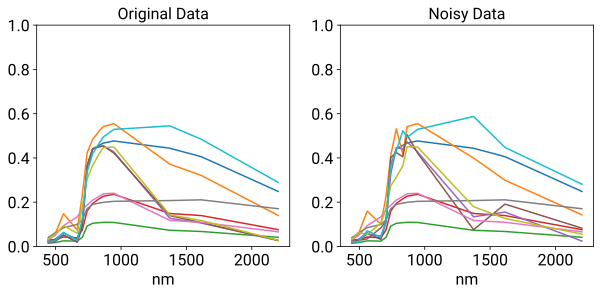

In [22]:
data_path = ['../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2A_lai-cab-ccc-car_lut_no-constraints.pkl', \
    '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_S2B_lai-cab-ccc-car_lut_no-constraints.pkl']

if isinstance(data_path, str):
  df = pd.read_pickle(data_path)
elif isinstance(data_path, list):
  dfs = [pd.read_pickle(path) for path in data_path]
  df = pd.concat(dfs, axis=0, ignore_index=True)

noisy_path = '../../results/lut_based_inversion/soil_scaled/prosail_danner-etal_switzerland_lai-cab-ccc-car_lut_no-constraints_mixed.pkl'
df_noisy = pd.read_pickle(noisy_path)

cols = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B10', 'B11', 'B12']
x = [442.7, 492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 945.1, 1373.5, 1613.7, 2202.4]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs = axs.flatten()

df_sample = df.sample(10, random_state=42)
axs[0].set_title('Original Data')
axs[0].plot(x, df_sample[cols].T, linestyle='-')
axs[0].set_ylim(0, 1) 
axs[0].set_xlabel('nm') 

df_noisy_sample = df_noisy.sample(10, random_state=42)
axs[1].set_title('Noisy Data')
axs[1].plot(x, df_noisy_sample[cols].T, linestyle='-')
axs[1].set_ylim(0, 1) 
axs[1].set_xlabel('nm')  

# Compare performance of noise models in low (LAI<3) and high LAI values

In [23]:
lowlai_results = '../../results/noise_results_NN_lowlai.xlsx'
highlai_results = '../../results/noise_results_NN_highlai.xlsx'

df_low = pd.read_excel(lowlai_results)
df_high = pd.read_excel(highlai_results)

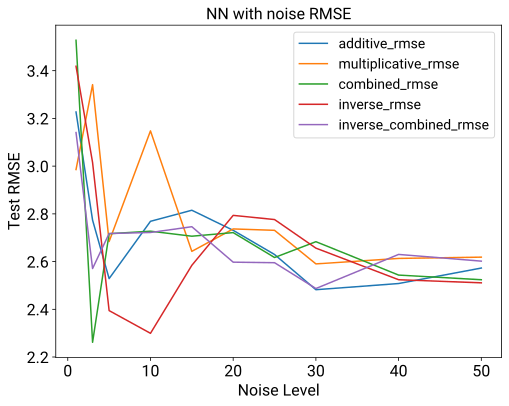

In [41]:
rmse_cols = [c for c in df_low.columns if 'rmse' in c]
df_total = df_low[rmse_cols] + df_high[rmse_cols]
df_total['Noise Level'] = df_low['Noise Level']

# Plot
plt.figure(figsize=(8, 6))
for noise_type in rmse_cols:
    plt.plot(df_total['Noise Level'], df_total[f'{noise_type}'], label=noise_type)
plt.xlabel('Noise Level')
plt.ylabel('Test RMSE')
plt.title('NN with noise RMSE')
plt.legend()

In [46]:
min_rmse = df_total['combined_rmse'].min()  # Finding the minimum value of column A
noise_lvl = df_total[df_total['combined_rmse'] == min_rmse]['Noise Level'].tolist()  # Filtering values of B where A is minimum
print(noise_lvl)

print(df_low[df_low['Noise Level']==3]['combined_rmse'])
print(df_high[df_high['Noise Level']==3]['combined_rmse'])

[3]
1    1.089144
Name: combined_rmse, dtype: float64
1    1.172703
Name: combined_rmse, dtype: float64


# Plot validation spectra to see what it looks like

In [6]:
val_path = '../../results/validation_data_extended_lai.pkl'
val_df = pd.read_pickle(val_path)

In [8]:
val_df.head()

,B02,B03,B04,B05,B06,B07,B08,B8A,B11,B12,geometry,date,lai,location,green_canopy_cover
2,0.0198,0.0488,0.0295,0.0788,0.2574,0.3147,0.3184,0.3346,0.1394,0.0760,POINT (9.06923 47.66701),2022-05-11 09:48:44,2.77,Arenenberg,NaN
4,0.0322,0.0490,0.0340,0.0715,0.2518,0.3346,0.3236,0.3461,0.1229,0.0693,POINT (9.06921 47.66710),2022-05-19 13:14:04,3.67,Arenenberg,NaN
5,0.0556,0.0857,0.0572,0.1342,0.3260,0.3996,0.4120,0.4260,0.1929,0.1080,POINT (9.06926 47.66706),2022-06-15 11:45:12,3.78,Arenenberg,NaN
8,0.0164,0.0438,0.0268,0.0725,0.2618,0.3215,0.3240,0.3400,0.1333,0.0664,POINT (9.06856 47.66724),2022-05-11 09:58:08,2.80,Arenenberg,NaN
10,0.0280,0.0455,0.0290,0.0717,0.2449,0.3348,0.3316,0.3515,0.1148,0.0624,POINT (9.06850 47.66722),2022-05-19 13:20:06,3.54,Arenenberg,NaN


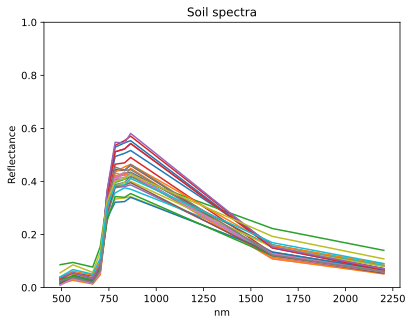

In [30]:
import matplotlib.pyplot as plt

# Define your DataFrame df and the columns of interest
cols = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
x = [492.4, 559.8, 664.6, 704.1, 740.5, 782.8, 832.8, 864.7, 1613.7, 2202.4]

val_df[cols].sample(30).T.set_index(pd.Index(x)).plot(legend=False)
plt.xlabel('nm')
plt.ylabel('Reflectance')
plt.title('Soil spectra')
plt.ylim((0,1))
plt.ylabel('Reflectance')
plt.xlabel('nm')
plt.show()